C:\Users\datog\AppData\Local\Temp\ipykernel_21708\4202689248.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="5y")['Open']  # Use 'Close' prices
[*********************100%***********************]  3 of 3 completed

Ticker            AAPL        GOOG        MSFT
Date                                          
2020-08-19  112.818242   77.206567  203.115352
2020-08-20  112.592089   76.716485  201.242545
2020-08-21  116.008744   78.385569  205.391481
2020-08-24  125.186343   79.228067  206.284659
2020-08-25  121.295478   78.636083  204.661599
...                ...         ...         ...
2025-08-12  228.009995  202.095001  523.750000
2025-08-13  231.070007  204.979996  532.109985
2025-08-14  234.059998  202.559998  522.559998
2025-08-15  234.000000  204.720001  522.770020
2025-08-18  231.779999  205.154999  521.585022

[1255 rows x 3 columns]


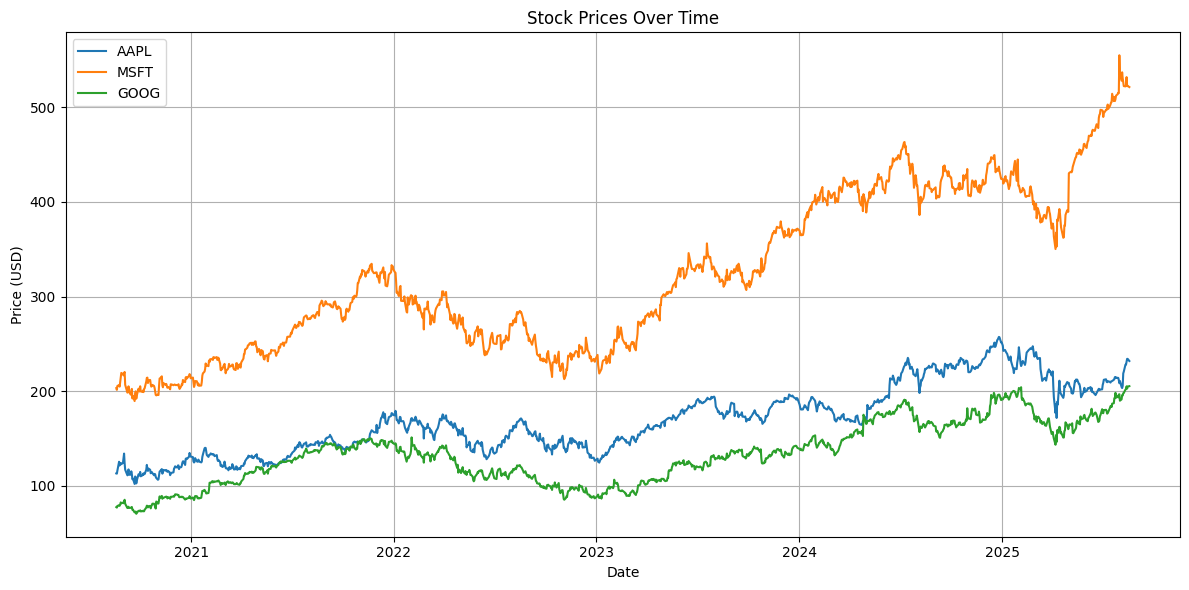

C:\Users\datog\AppData\Local\Temp\ipykernel_21708\4202689248.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="3y")['Close']
[*********************100%***********************]  4 of 4 completed


In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# List of tickers
tickers = ["AAPL", "MSFT", "GOOG"]

# Download historical daily data for 1 year
data = yf.download(tickers, period="5y")['Open']  # Use 'Close' prices
print(data)
# Plot
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
data = yf.download(tickers, period="3y")['Close']
data.to_csv("stocks_data.csv")


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-08-19 to 2025-08-18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1255 non-null   float64
 1   GOOG    1255 non-null   float64
 2   MSFT    1255 non-null   float64
dtypes: float64(3)
memory usage: 39.2 KB
None


In [12]:
print(data.index)

DatetimeIndex(['2020-08-19', '2020-08-20', '2020-08-21', '2020-08-24',
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-31', '2020-09-01',
               ...
               '2025-08-05', '2025-08-06', '2025-08-07', '2025-08-08',
               '2025-08-11', '2025-08-12', '2025-08-13', '2025-08-14',
               '2025-08-15', '2025-08-18'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)


In [13]:
bata=[1,2,3,4,5]

In [16]:
print(bata.index)

<built-in method index of list object at 0x000001B7332F6D40>


In [17]:
returns = data.pct_change().dropna()


In [18]:
volatility = returns.rolling(window=20).std() * (252**0.5)  # Annualized


In [19]:
correlation = returns.corr()


In [23]:
import numpy as np
from scipy.optimize import minimize

def portfolio_stats(weights, returns):
    mean_return = np.sum(weights * returns.mean()) * 252
    cov_matrix = returns.cov() * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return mean_return, volatility

def negative_sharpe(weights, returns, risk_free_rate=0.01):
    mean_return, volatility = portfolio_stats(weights, returns)
    return -(mean_return - risk_free_rate) / volatility

num_assets = len(returns.columns)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for _ in range(num_assets))
result = minimize(negative_sharpe, num_assets*[1./num_assets], args=(returns,),
                  method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x


In [30]:
short_window = 20
long_window = 50
signals = pd.DataFrame(index=data.index)
signals['signal'] = 0
signals['short_ma'] = data['AAPL'].rolling(short_window).mean()
signals['long_ma'] = data['AAPL'].rolling(long_window).mean()
signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1, 0)
signals['positions'] = signals['signal'].diff()


C:\Users\datog\AppData\Local\Temp\ipykernel_21708\3489062569.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\datog\AppData\Local\Temp\ipykernel_21708\3489062569.py:7: SettingWithCopyWarning:


A value is trying to be set on a co

In [31]:
import streamlit as st
import plotly.express as px

st.title("Stock Portfolio Dashboard")
fig = px.line(data, x=data.index, y=data.columns, title="Stock Prices Over Time")
st.plotly_chart(fig)


2025-08-18 16:36:55.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.432 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 16:36:55.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()